# Wine Quality Data Set 

Detecting the wine quality using physicochemical (inputs) and sensory (the output) variables from so-called experts  
The data cane be found at  
https://archive.ics.uci.edu/ml/datasets/Wine+Quality


In [1]:
import pandas as pd 
import pprint
import numpy as np
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sns 
import math 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# First start by looking at the data set 

In [2]:
red_wine_raw = pd.read_csv("winequality-red.csv",sep = ';' )
red_wine_raw.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
red_wine_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see that there are 1599 observations of the 12 variables. There are no nulls and no flag variables.  
From the description we of the variables we know that quality can be categorical and potentially pH but for now they can be continous variables. 

## Plot the individual variables 

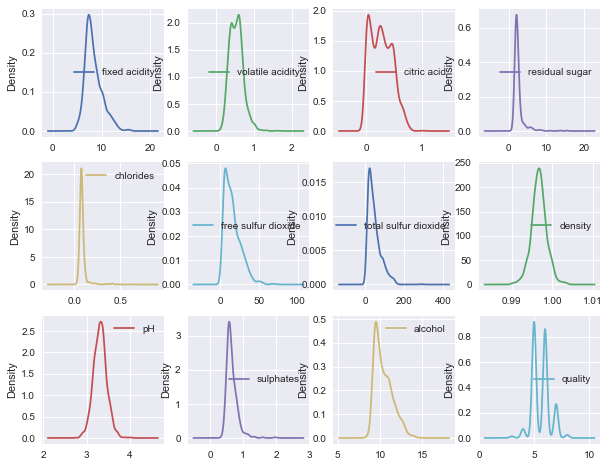

In [4]:
red_wine_raw.plot(kind = 'density',subplots = True, layout =(3,4), sharex = False )
plt.show()

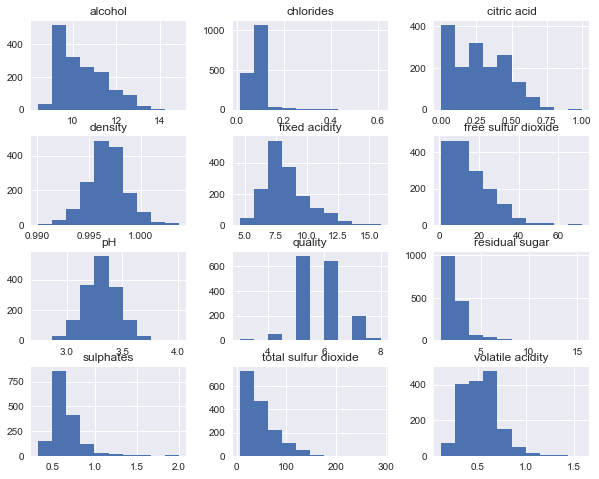

In [5]:
red_wine_raw.hist()
plt.show()

### A Quick Variable Run down

1. Alcohol has a nice balanced distribution. Fewer observations with higher alcohol content. Peak at 9/10 
2. Chlorides is pretty sparse, mainly around 0, 0.1. Probably won't be very useful 
3. Citric acid has a nice distribution 
4. Density looks normally distributed- could be a good variable 
5. Fixed acidity has a nice, skewed normal distribution 
6. Free sulfur dioxide has fewer observations as the dioxide increases.  
7. Sulphates nice distribution, could be normal 
8. Quality - categorial, strong peaks at 5 and 6. 
9. Volatile acidity - Peak at 0, tapering off quickly 
10. Sulphates- looks as if there is a peak around the mean has a decent distribution 
11. Total sulfur dioxide is bounded by 0 and decreasing as dioxide increases- nice distribution 
12. Volatile acidity- nice distribution, peaks from 0.4- 0.6ish 

### Whisker Plots 

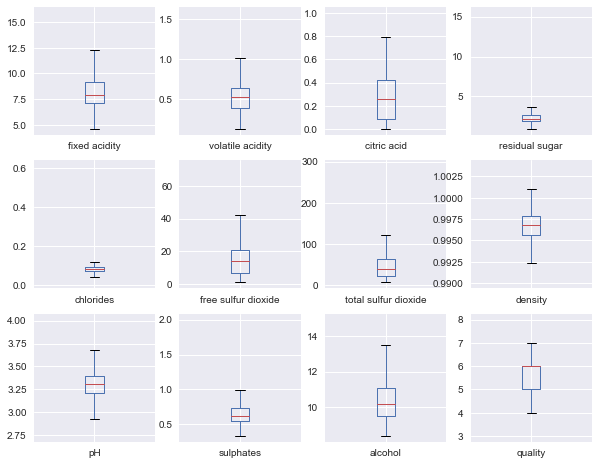

In [6]:
red_wine_raw.plot(kind = 'box', subplots = True, layout = (3,4), sharex = False, sharey = False)
plt.show()

*Interpret these graphs*

It seems like chlorides and residual sugars have the smallest range and compact distribution while citric acid and alcohol have larger less compact distributions. We can see this by looking at how close the lines of the box are together and where the mean falls within those blue lines.   

-- Remember these have to do mainly with quantiles 
Quality is skewed, chlorides and residual sugars have low variance and are tightly distributed- maybe have many values around peaks 

In [7]:
from pandas.tools.plotting import scatter_matrix

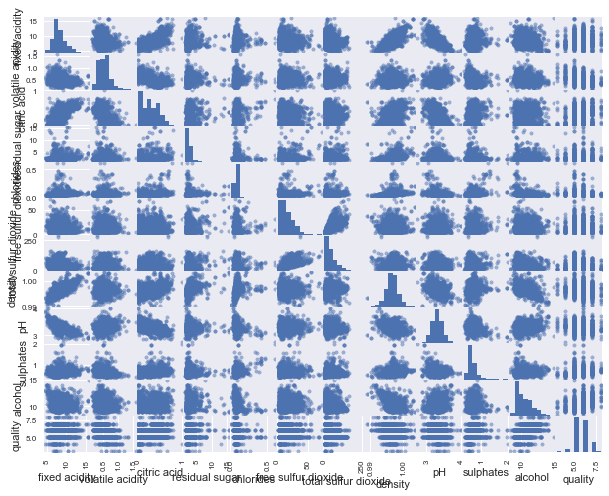

In [8]:
scatter_matrix(red_wine_raw)
plt.show()

## Let's look at the correlation between variables 


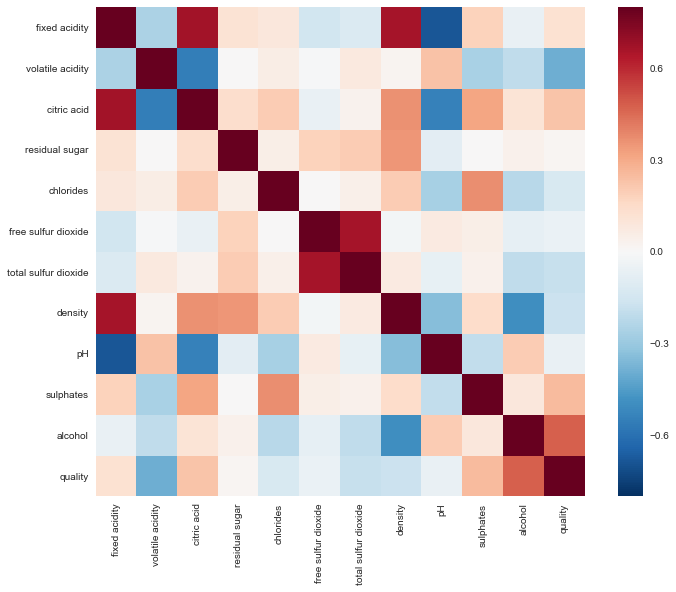

In [9]:
corr_mat = red_wine_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True)

### Quick Rundown 

Strong correlations: 
1. Fixed acidity, density (+)
2. Fixed acidity, pH (-)
3. Free sulfur dioxide, Total sulfur dioxide (expected) (+)
4. Volatile acidity, citric acid (-) 
5. Density, alcohol (-) ((weak))


## Begin Modeling

### Let's try making some features that could be helpful 

In [10]:
red_wine_raw.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [11]:
red_wine_edit = red_wine_raw

In [12]:
red_wine_edit["free_sulf_ratio"] = red_wine_raw["free sulfur dioxide"]/ red_wine_raw["total sulfur dioxide"]
red_wine_edit["fixed_volatile_perc"] = red_wine_raw["fixed acidity"]/(red_wine_raw["volatile acidity"] + 
                                                                      red_wine_raw["fixed acidity"])
red_wine_edit["sugar_alcohol_ratio"] = red_wine_raw["residual sugar"]/ red_wine_raw["alcohol"]
red_wine_edit["sugar_density_ratio"] = red_wine_raw["residual sugar"]/ red_wine_raw["density"]
red_wine_edit["chlorides_sulphates_ratio"] = red_wine_raw["chlorides"]/red_wine_raw["sulphates"]

In [13]:
num_indep_vars = len(red_wine_edit.columns.values)
indep_var_names = red_wine_edit.columns.values
print("There are now ", num_indep_vars, " independent variables. They are \n" ,indep_var_names)

There are now  17  independent variables. They are 
 ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality' 'free_sulf_ratio' 'fixed_volatile_perc'
 'sugar_alcohol_ratio' 'sugar_density_ratio' 'chlorides_sulphates_ratio']


## Pre Processing

Let's make a standardized and normalized copy of the data  
We will import the relevant pacakges and then make 2 copies of the data set 

In [14]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 

In [15]:
# Drop dependent variable 
red_wine_no_y = red_wine_edit.drop(["quality"], 1)

In [16]:
scaler = MinMaxScaler(feature_range = (0,1)).fit(red_wine_no_y)
red_wine_scale = scaler.transform(red_wine_no_y)
pd.DataFrame(red_wine_scale, columns = red_wine_no_y.columns).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,free_sulf_ratio,fixed_volatile_perc,sugar_alcohol_ratio,sugar_density_ratio,chlorides_sulphates_ratio
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.430941,0.692273,0.106470,0.112511,0.191930
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.185518,0.154540,0.086866,0.096889,0.097997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.283470,0.586324,0.068403,0.068524,0.134913
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.422179,0.695788,0.085502,0.089177,0.178413
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.553826,0.818195,0.112144,0.116560,0.228653
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Note the min is 0 and max is 1 and we can potentially sort by standard deviation to under relatively which variable has the most variance 

Also we can compare the quantiles and see that most of the 75% quantiles are below 0.6 so there might be some outliers. 

In [17]:
red_wine_standard_scaler = StandardScaler().fit(red_wine_no_y)
red_wine_standard = red_wine_standard_scaler.transform(red_wine_no_y)
red_wine_standard = pd.DataFrame(red_wine_standard, columns = red_wine_no_y.columns)
red_wine_standard.describe().round(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,free_sulf_ratio,fixed_volatile_perc,sugar_alcohol_ratio,sugar_density_ratio,chlorides_sulphates_ratio
count,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000
mean,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000
std,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003
min,-2.1370,-2.2783,-1.3915,-1.1627,-1.6039,-1.4225,-1.2306,-3.5387,-3.7004,-1.9365,-1.8989,-2.3236,-4.4810,-1.2261,-1.1616,-1.9591
25%,-0.7007,-0.7699,-0.9293,-0.4532,-0.3712,-0.8487,-0.7440,-0.6078,-0.6551,-0.6382,-0.8664,-0.7952,-0.6858,-0.4384,-0.4541,-0.5820
50%,-0.2411,-0.0437,-0.0564,-0.2404,-0.1799,-0.1793,-0.2575,0.0018,-0.0072,-0.2251,-0.2093,-0.0472,0.0227,-0.2415,-0.2409,-0.1380
75%,0.5058,0.6267,0.7652,0.0434,0.0538,0.4901,0.4723,0.5768,0.5759,0.4240,0.6355,0.6626,0.8151,0.0653,0.0418,0.3749
max,4.3551,5.8780,3.7436,9.1957,11.1270,5.3673,7.3752,3.6801,4.5283,7.9187,4.2025,3.0684,1.9919,10.2895,9.1627,8.2484


Note the Mean and std being 0 and 1 relatively. 

Let's use the Standardized data because we will start with some linear regression stuff 

# Feature Initial Selection 

In [18]:
X = red_wine_standard
X.columns = red_wine_no_y.columns
Y = red_wine_edit["quality"]

In [19]:
print(red_wine_edit.shape)

(1599, 17)


In [20]:
print(red_wine_edit.shape)

(1599, 17)


### Begin Recursive Feature Selection 

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
model1 = LinearRegression()
rfe1 = RFE(model1, 4)
fit1 = rfe1.fit(X,Y)
top_rfe_vars = X.columns[fit1.support_]

In [58]:
print("Num Features: ", fit1.n_features_)
print("Features: ", top_rfe_vars)
print("Feature Ranking: ", fit1.ranking_) 

Num Features:  4
Features:  Index(['residual sugar', 'alcohol', 'sugar_alcohol_ratio',
       'sugar_density_ratio'],
      dtype='object')
Feature Ranking:  [11  6  9  1 13 10  5 12  7  3  1  8  2  1  1  4]


We see that the ideal number of features for the linear regression is 4 as compared to the original 11. 
Those variables are : residual sugar, free_sulf_ratio, fixed_volatile_perc, sugar_density_ratio  
If we wanted to reduce the variance or computation time for the other processes we could use these variables. 
It will be interesting to compare variable importances in the other algorithms. 

In [60]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
rfe2 = RFE(model2, 4)
fit2 = rfe2.fit(X,Y)
top_rfe2_vars = X.columns[fit2.support_]

In [61]:
top_rfe2_vars

Index(['total sulfur dioxide', 'sulphates', 'alcohol', 'fixed_volatile_perc'], dtype='object')

# Begin Preparing Data for Algorithms 

Split data into test and train sets 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

# Begin using the Algorithms 

### Start with Linear regression 

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [26]:
linear_fit = LinearRegression()
linear_fit.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
X_train.shape

(1199, 16)

In [28]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(linear_fit.coef_))], axis = 1)
coefficients.columns = ["Variable", "Scaled Coefficients"]
coefficients["Abs Scaled Coefs"] = np.abs(coefficients["Scaled Coefficients"])

In [29]:
coef_dict1 ={}
x = 0
for data in X.columns.values[0:(num_indep_vars-2)]:
    coef_dict1[data] = linear_fit.coef_[x]
    x = x+1 

pprint.pprint(coef_dict1)

{'alcohol': 0.36957315868996332,
 'chlorides': 0.054603336136037794,
 'citric acid': -0.076360412076218034,
 'density': -0.012400928122915163,
 'fixed acidity': 0.051897238367267069,
 'fixed_volatile_perc': 0.1109929088504332,
 'free sulfur dioxide': -0.0014589056863684655,
 'free_sulf_ratio': 0.05032231956256894,
 'pH': -0.062868693435003148,
 'residual sugar': -9.8758074321546889,
 'sugar_alcohol_ratio': 0.39021909981196368,
 'sugar_density_ratio': 9.5166875437033127,
 'sulphates': 0.073889281723032441,
 'total sulfur dioxide': -0.047876601722147277,
 'volatile acidity': -0.12783930969185225}


In [30]:
# Absolute value of the coefficients 
coef_abs_dict1 ={}
x = 0
for data in red_wine_raw.columns.values[0:(num_indep_vars-1)]:
    coef_abs_dict1[data] = np.absolute(linear_fit.coef_[x])
    x = x+1 

pprint.pprint(coef_abs_dict1)

{'alcohol': 0.36957315868996332,
 'chlorides': 0.054603336136037794,
 'citric acid': 0.076360412076218034,
 'density': 0.012400928122915163,
 'fixed acidity': 0.051897238367267069,
 'fixed_volatile_perc': 0.39021909981196368,
 'free sulfur dioxide': 0.0014589056863684655,
 'free_sulf_ratio': 0.1109929088504332,
 'pH': 0.062868693435003148,
 'quality': 0.05032231956256894,
 'residual sugar': 9.8758074321546889,
 'sugar_alcohol_ratio': 9.5166875437033127,
 'sugar_density_ratio': 0.15261245899216036,
 'sulphates': 0.073889281723032441,
 'total sulfur dioxide': 0.047876601722147277,
 'volatile acidity': 0.12783930969185225}


These are scaled coefficients so we should not interpret them with the variable associated but rather against each other. Residual sugar and sugar alochol ratio are very high. From the previous regression we see that they are of opposite signs and are probably highly correlated. 

We will get rid of one of them to see how the regression is affected

In [31]:
linear_fit.score(X_train, y_train)

0.39890344701544178

In [32]:
linear_fit.score(X_test, y_test)

0.23591177533749741

We similar R2 performance across the test and training set so we can assume the model generalized well 

### Random Forest 

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf1 = RandomForestRegressor(n_estimators=100, max_depth = 4).fit(X_train, y_train)

In [35]:
rf1.score(X_test, y_test)

0.30117395211928322

In [36]:
rf1.score(X_train, y_train)

0.50585103648933993

We see very different performance for the test set and the training set. The model is overfitting.  
Let's do a search to see if we can find the optimal hyper parameters for the random forest 

In [37]:
# specify parameters and distributions to sample from
np.random.seed(1234)
param_dist = {"n_estimators": [10, 30, 100, 200, 400], 
              "max_depth": [1,3, 6, None],
              #"min_samples_split": [2,3,7,13],
              "min_samples_leaf": [3,7,11], 
              #"max_leaf_nodes": [2,4, None],
              "max_features": [None, 'auto', 'sqrt', 3, 7, 11]
              }
n_iter_search = 30

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

We won't do grid search because it will take too long. 

In [39]:
rf1_random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist,
                                   n_iter=n_iter_search, cv = 4)

In [40]:
rf1_random_search.fit(X, Y)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'max_features': [None, 'auto', 'sqrt', 3, 7, 11], 'n_estimators': [10, 30, 100, 200, 400], 'min_samples_leaf': [3, 7, 11], 'max_depth': [1, 3, 6, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

### Begin Analyzing the results from Grid 

In [41]:
# Options for results
#dir(rf1_random_search)
rf1_random_search.cv_results_.keys()

dict_keys(['split0_test_score', 'std_test_score', 'split2_test_score', 'param_max_depth', 'std_train_score', 'split3_test_score', 'split1_test_score', 'mean_score_time', 'split0_train_score', 'param_min_samples_leaf', 'split2_train_score', 'mean_train_score', 'split1_train_score', 'mean_fit_time', 'param_max_features', 'std_score_time', 'mean_test_score', 'split3_train_score', 'std_fit_time', 'param_n_estimators', 'params', 'rank_test_score'])

In [42]:
wanted_grid_params = ["mean_train_score" ,"mean_test_score", "param_n_estimators", "param_max_depth", 
                      "param_max_features", "param_min_samples_leaf", "rank_test_score"]
# Which params are in both lists 
set(wanted_grid_params) & set(rf1_random_search.cv_results_.keys())

{'mean_test_score',
 'mean_train_score',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_leaf',
 'param_n_estimators',
 'rank_test_score'}

In [43]:
dict_temp = {x:rf1_random_search.cv_results_[x] for x in wanted_grid_params}
search_results = pd.DataFrame(dict_temp)
search_results.sort_values(by=["mean_test_score"], ascending = False).head()

,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score
8,0.315542,0.691587,None,7,7,200,1
18,0.312566,0.689539,None,7,7,100,2
24,0.307397,0.804820,None,sqrt,3,30,3
23,0.306552,0.706952,None,11,7,200,4
26,0.306343,0.589975,None,sqrt,11,400,5


In [44]:
print("Best Estimator Score according to sklearn", rf1_random_search.best_score_)
rf_best = rf1_random_search.best_estimator_
rf_best

Best Estimator Score according to sklearn 0.31554178594


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Let's examine the model with the lower number of trees as it is simplier  
I am very suspicious that it is overfitting as the R2 is very high 

In [45]:
rf_best2 = RandomForestRegressor(max_depth= 6, max_features=None, min_samples_leaf=3, n_estimators=100).fit(X_train, y_train)

In [46]:
rf_best.feature_importances_

array([ 0.02692315,  0.09019015,  0.03492318,  0.01156835,  0.02818183,
        0.02545666,  0.05637756,  0.04618741,  0.02578244,  0.11813997,
        0.25860241,  0.03977275,  0.09374227,  0.02257801,  0.02678738,
        0.09478647])

In [47]:
coef_dict1 ={}
x = 0
for data in X.columns.values[0:(num_indep_vars-2)]:
    coef_dict1[data] = linear_fit.coef_[x]
    x = x+1 

pprint.pprint(coef_dict1)

{'alcohol': 0.36957315868996332,
 'chlorides': 0.054603336136037794,
 'citric acid': -0.076360412076218034,
 'density': -0.012400928122915163,
 'fixed acidity': 0.051897238367267069,
 'fixed_volatile_perc': 0.1109929088504332,
 'free sulfur dioxide': -0.0014589056863684655,
 'free_sulf_ratio': 0.05032231956256894,
 'pH': -0.062868693435003148,
 'residual sugar': -9.8758074321546889,
 'sugar_alcohol_ratio': 0.39021909981196368,
 'sugar_density_ratio': 9.5166875437033127,
 'sulphates': 0.073889281723032441,
 'total sulfur dioxide': -0.047876601722147277,
 'volatile acidity': -0.12783930969185225}


In [48]:
rf_imp1 ={}
x = 0
for var in X.columns:
    rf_imp1[var] = (rf_best.feature_importances_[x], rf_best2.feature_importances_[x]) 
    x = x+1 

feature_importances = pd.DataFrame(rf_imp1).transpose()
feature_importances.columns = ["Sk_learn RF Importance", "Refit Model Importance"]

We can see that the most important are 
* alcohol 
* sulphates 
* volatile acidity 
* total sulfur dioxide (maybe) 

In [49]:
feature_importances

,Sk_learn RF Importance,Refit Model Importance
alcohol,0.258602,0.385799
chlorides,0.028182,0.015998
chlorides_sulphates_ratio,0.094786,0.057255
citric acid,0.034923,0.025059
density,0.046187,0.018422
fixed acidity,0.026923,0.020172
fixed_volatile_perc,0.093742,0.070237
free sulfur dioxide,0.025457,0.024076
free_sulf_ratio,0.039773,0.036596
pH,0.025782,0.019731


### Compare Model Performances 

In [50]:
feature_importances.sort_values(by = ["Refit Model Importance"], ascending=False).head()

,Sk_learn RF Importance,Refit Model Importance
alcohol,0.258602,0.385799
volatile acidity,0.090190,0.127263
sulphates,0.118140,0.112490
fixed_volatile_perc,0.093742,0.070237
chlorides_sulphates_ratio,0.094786,0.057255


In [51]:
feature_importances.sort_values(by = ["Sk_learn RF Importance"], ascending=False).head()

,Sk_learn RF Importance,Refit Model Importance
alcohol,0.258602,0.385799
sulphates,0.118140,0.112490
chlorides_sulphates_ratio,0.094786,0.057255
fixed_volatile_perc,0.093742,0.070237
volatile acidity,0.090190,0.127263


In [52]:
# Linear regression coefficients 
coefficients.sort_values(by = ["Abs Scaled Coefs"], ascending = False ).head()

,Variable,Scaled Coefficients,Abs Scaled Coefs
3,residual sugar,-9.875807,9.875807
14,sugar_density_ratio,9.516688,9.516688
13,sugar_alcohol_ratio,0.390219,0.390219
10,alcohol,0.369573,0.369573
15,chlorides_sulphates_ratio,-0.152612,0.152612


In [59]:
top_rfe_vars

Index(['residual sugar', 'alcohol', 'sugar_alcohol_ratio',
       'sugar_density_ratio'],
      dtype='object')

### Evaluation Metric 

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits= 7, random_state=22)

In [54]:
lin_results = cross_val_score(linear_fit, X_train, y_train, cv=kfold)
print((lin_results.mean()*100.0, lin_results.std()*100.0))

(36.689676120379339, 4.9327058616436519)


In [55]:
rf_results = cross_val_score(rf_best, X_train, y_train, cv = kfold)
print(rf_results.mean()*100.0, rf_results.std()*100.0)

44.0484359559 4.02212617513


In [56]:
rf2_results = cross_val_score(rf_best2, X_train, y_train, cv = kfold)
print(rf2_results.mean()*100.0, rf2_results.std()*100.0)

43.1592381453 5.05344414835


Note that the random forest has a higher mean and lower standard deviation. 
We can be fairly certain that the random forest will perform better than a linear regression 